<a href="https://colab.research.google.com/github/xanderdavies/unifying-grok-dd/blob/main/toy_grok_dd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A Simple Model for Grokking and Double Descent

Xander Davies, Lauro Langosco, and David Krueger

In [ ]:
import matplotlib.pyplot as plt
import numpy as np 
%matplotlib inline

We model learning dynamics as the interaction between *patterns*, or particular input-output functions learned during the training process. At timestep $t$, we say pattern $i$ achieves accuracy $p_i(t)$ on the training set, modeled by a sigmoid function parameterized by a maximum predictiveness $0 \leq \gamma_i \leq 1$, inflection point $b_i \geq 0$, and learning speed $\alpha_i \geq 0$:
\begin{equation*}
p_i(t) = \frac{\gamma_i}{1 + e^{-\alpha_i(x - b_i)}}
\end{equation*}

During training, classification is modeled as series of *independent* Bernoulli events (one per pattern), so that for each pattern $i$ at each time step $t$ we have a corresponding Bernoulli event:
\begin{equation*}
X_i^t \sim \text{Bern}(p_i(t))
\end{equation*}

Collective training accuracy of all $n$ patterns is modeled as the union of these events:
\begin{align*}
\text{acc}_{\text{train}} (t)  = P\left(\bigcup_{i=1}^n X_i^t\right)=\sum_i P\left(X_i^t\right)-\sum_{i<j} P\left(X_i^t \cap X_j^t\right)+\sum_{i<j<k} P\left(X_i^t \cap X_j^t \cap X_k^t\right)-\ldots \\
+(-1)^{n+1} P\left(X_1^t \cap \cdots \cap X_n^t\right)
\end{align*}

That is, if any pattern successfully classifies the example, the collective model does as well. At test time, we assign generalization parameters $g_i$ and say generalization $G$ occurs with probability $g_i$ if $X_i^t$ is the sole successful event, and $\frac{g_i + \cdots + g_m}{m}$ in the case of $m$ successful events $\{X_i^t, \cdots, X_m^t\}$:
\begin{align*}
\text{acc}_{\text{test}} (t)  = \sum_i g_i P\left(X_i^t\right)-\sum_{i<j} \frac{g_i + g_j}{2} P\left(X_i^t \cap X_j^t\right)+\sum_{i<j<k} \frac{g_i + g_j + g_k}{3} P\left(X_i^t \cap X_j^t \cap X_k^t\right)-\ldots \\
+(-1)^{n+1} \frac{g_1 + \cdots g_n}{n} P\left(X_1^t \cap \cdots \cap X_n^t\right)
\end{align*}

We now introduce a notion of a *preferred pattern*; we'll later provide an alternative intuition for this behavior.

**Preferred Pattern.**
A pattern $i$ is preferred if $P(G_t|X_i \cap X_j \cap \cdots) = g_i$. That is, generalization always occurs w.r.t $i$'s generalization parameter $g_i$ if $X_i$ is successful, even if multiple other patterns have successful events.

In the case of a single preferred pattern $0$, this induces test accuracy:
\begin{align*}
\text{acc}_{\text{test}} (t) = g_0 P(X_0^t) + \sum_{i>0} g_i P\left(X_i^t \cap \neg X_0^t \right)-\sum_{i<j} \frac{g_i + g_j}{2} P\left(X_i^t \cap X_j^t \cap \neg X_0^t \right) \\ 
% +\sum_{i<j<k} \frac{g_i + g_j + g_k}{3} P\left(X_i^t \cap X_j^t \cap X_k^t \cap \neg X_0^t\right)-\ldots 
+\ldots + (-1)^{n+1} \frac{g_1 + \cdots g_n}{n} P\left(X_1^t \cap \cdots \cap X_n^t \cap \neg X_0^t\right)
\end{align*}

<!-- We model double descent & grokking learning dynamics through three patterns (or groups of patterns with equivalent properties):
1. *Fast-to-learn, well-generalizing patterns (heuristics).* In double descent, we model these patterns as being able to explain 70% of the data ($\gamma_1 = .7$) and generalizing perfectly ($g_1=1$). In grokking, we say there aren't any such heuristics ($\gamma_1=0$). 
2. *Medium-to-learn, poorly-generalizing patterns (overfitting).* This category of pattern includes memorization, so has $\gamma_2 = 1$ and $g_2=0$ in both double descent and grokking.
3. *Slow-to-learn, well-generalizing patterns, which are __favored__.* In both cases, we say $g_3=1$, but in double descent we say these patterns can only explain 20% of the data ($\gamma_1 = .2$) and in grokking we say it can explain all of the data ($\gamma_1 = 1$). These patterns (in both cases) have the special property of being *preferred*, which means they are used in any case where they are predictive (as opposed to this being decided randomely in cases where multiple patterns overlap). -->


We model double descent & grokking learning dynamics as the interaction of three patterns:
1. **Type 1.** A well-generalizing pattern which is learned quickly during training (*heuristics*). In double descent, we model these patterns as being able to explain 70% of the data ($\gamma_1 = .7$) and generalizing perfectly ($g_1=1$). In grokking, we say there aren't any such heuristics ($\gamma_1=0$). 
2. **Type 2.** A poorly-generalizing pattern which is learned slower than heuristics but quicker than category 3 patterns (*overfitting*). This category of pattern includes memorization, so has $\gamma_2 = 1$ and $g_2=0$ in both double descent and grokking.
3. **Type 3.** A well-generalizing pattern which is learned slowly, but is ultimately *preferred* by the training regime (def above). In both cases, we say $g_3=1$, but in double descent we say these patterns can only explain 20% of the data ($\gamma_1 = .2$) and in grokking we say it can explain all of the data ($\gamma_1 = 1$). These patterns (in both cases) have the special property of being *preferred*, which means they are used in any case where they are predictive (as opposed to this being decided randomely in cases where multiple patterns overlap).


<!-- We define accuracy $\text{acc}(t)$ at timestep $t$ per:

\begin{align}
\text{acc}(t) &= \text{pred}_1(t) \cup \text{pred}_2(t) \cup \text{pred}_3(t) \\
&= \text{pred}_1(t) + \text{pred}_2(t) + \text{pred}_3(t) - \left(\text{pred}_1(t) \text{pred}_2(t) + \text{pred}_1(t) \text{pred}_3(t) + \text{pred}_2(t) \text{pred}_3(t)\right) + \text{pred}_1(t) \text{pred}_2(t) \text{pred}_3(t) 
\end{align}

We define pattern usage $u_i(t)$ as the proportion of examples seen by $p_i$ at timestep $t$, which is upperbounded by $\text{pred}_i(t)$:
\begin{align}
u_1(t) &= \text{pred}_1(t) - \text{pred}_1(t) \text{pred}_3(t) + \frac{\text{pred}_1(t) \text{pred}_2(t) \text{pred}_3(t) - \text{pred}_1(t) \text{pred}_2(t)}{2} \\
u_2(t) &= \text{pred}_2(t) - \text{pred}_2(t) \text{pred}_3(t) + \frac{\text{pred}_1(t) \text{pred}_2(t) \text{pred}_3(t) - \text{pred}_1(t) \text{pred}_2(t)}{2} \\
u_3(t) &= \text{pred}_3(t)
\end{align}

*Note that $u_1(t) + u_2(t) + u_3(t) \leq 1$, $\forall t \geq 0, \text{pred}_i \leq 1$.*

We then say our model generalizes according to each pattern's generality $g_i$ applied to each usage $u_i(t)$:

\begin{align}
\text{gen}(t) = g_1 u_1(t) + g_2 u_2(t) + g_3 u_3(t)
\end{align} -->

In [ ]:
def pred_i(p, t):
  return p["gamma"] / (1 + np.exp(-p["alpha"]*(t - p["b"])))

def acc(p_1, p_2, p_3, t):
  preds = [pred_i(p_1, t), pred_i(p_2, t), pred_i(p_3, t)]
  return preds[0] + preds[1] + preds[2] - preds[0]*preds[1] - preds[0] * preds[2] - preds[1] * preds[2] + preds[0] * preds[1] * preds[2]

def gen(p_1, p_2, p_3, t):
  preds = [pred_i(p_1, t), pred_i(p_2, t), pred_i(p_3, t)]
  u_1 = preds[0] - preds[2]*preds[0] - preds[0]*preds[1]/2 + preds[0]*preds[1]*preds[2]/2
  u_2 = preds[1] - preds[2]*preds[1] - preds[0]*preds[1]/2 + preds[0]*preds[1]*preds[2]/2
  u_3 = preds[2]
  return u_1*p_1["g"] + u_2*p_2["g"] + u_3*p_3["g"]

In [ ]:
#@title Double Descent <> Grokking

#@markdown *To transition between double descent and grokking, lower the predictiveness of heuristics, and increase the predictiviness of the slow well-generalizing patterns.*

import ipywidgets as widgets
grokking = False
STEPS = 300

p_1 = {
    "gamma": 0. if grokking else 0.7,
    "alpha": .15,
    "b": 30,
    "g": 1,
}

p_2 = {
    "gamma": 1,
    "alpha": .15,
    "b": 50,
    "g": 0,
}

p_3 = {
    "gamma": 1. if grokking else 0.2,
    "alpha": .05,
    "b": 200,
    "g": 1,
}

@widgets.interact(heuristics=(0., 1.), slow_good=(0., 1.))
def plot_grok_dd(heuristics=p_1["gamma"], slow_good=p_3["gamma"]):
  p_1["gamma"] = heuristics
  p_3["gamma"] = slow_good

  x = np.arange(0, STEPS)
  fig, axs = plt.subplots(1, 2, figsize=(20,8))
  fig.canvas.header_visible = False

  # feature learning
  heuristics, = axs[0].plot(x, pred_i(p_1, x), label="heuristics")
  memorization, = axs[0].plot(x, pred_i(p_2, x), label="overfitting")
  slow, = axs[0].plot(x, pred_i(p_3, x), label="slow \nwell-generalizing")
  axs[0].set_xlabel("epochs")
  axs[0].set_ylabel("Predictiveness")
  axs[0].legend()
  axs[0].set_title("Pattern Learning")

  # accuracy
  train, = axs[1].plot(x, acc(p_1, p_2, p_3, x), label="train", color="gray")
  test, = axs[1].plot(x, gen(p_1, p_2, p_3, x), label="test", color="red")
  axs[1].set_xlabel("epochs")
  axs[1].set_ylabel("Accuracy")
  axs[1].set_title("Accuracy")
  axs[1].legend()

interactive(children=(FloatSlider(value=0.7, description='heuristics', max=1.0), FloatSlider(value=0.2, descri…

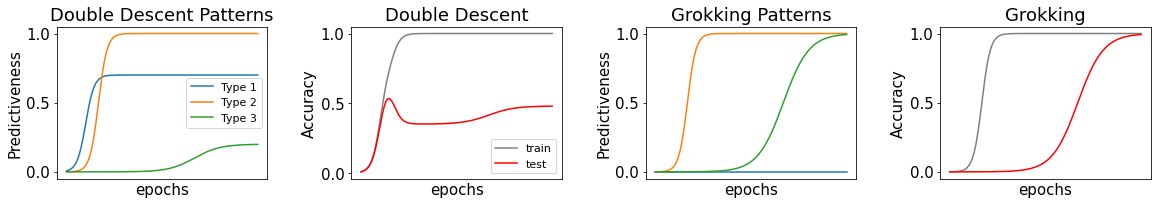

In [ ]:
#@title Figure in paper

STEPS = 300

p_1 = {
    "gamma": 0.7,
    "alpha": .15,
    "b": 30,
    "g": 1,
}

p_2 = {
    "gamma": 1,
    "alpha": .15,
    "b": 50,
    "g": 0,
}

p_3 = {
    "gamma": 0.2,
    "alpha": .05,
    "b": 200,
    "g": 1,
}

x = np.arange(0, STEPS)
fig, axs = plt.subplots(1, 4, figsize=(28*.7,4*.7))


SMALL_SIZE = 15
plt.rc('font', size=SMALL_SIZE+1)
plt.rc('axes', titlesize=SMALL_SIZE+3)
plt.rc('legend', fontsize=SMALL_SIZE-4) 

## Double Descent
# feature learning
heuristics, = axs[0].plot(x, pred_i(p_1, x), label="Type 1")
memorization, = axs[0].plot(x, pred_i(p_2, x), label="Type 2")
slow, = axs[0].plot(x, pred_i(p_3, x), label="Type 3")
axs[0].set_xlabel("epochs")
axs[0].set_ylabel("Predictiveness")
axs[0].legend()
axs[0].set_xticks([])
axs[0].set_title("Double Descent Patterns")

# accuracy
train, = axs[1].plot(x, acc(p_1, p_2, p_3, x), label="train", color="gray")
test, = axs[1].plot(x, gen(p_1, p_2, p_3, x), label="test", color="red")
axs[1].set_ylabel("Accuracy")
axs[1].set_xlabel("epochs")
axs[1].set_xticks([])
axs[1].set_title("Double Descent")
axs[1].legend()

## GROK
p_1["gamma"] = 0.
p_3["gamma"] = 1.# feature learning
heuristics, = axs[2].plot(x, pred_i(p_1, x), label="Type 1")
memorization, = axs[2].plot(x, pred_i(p_2, x), label="Type 2")
slow, = axs[2].plot(x, pred_i(p_3, x), label="Type 3")
axs[2].set_ylabel("Predictiveness")
# axs[2].legend(loc="lower left")
axs[2].set_xlabel("epochs")
axs[2].set_xticks([])
axs[2].set_title("Grokking Patterns")

# accuracy
train, = axs[3].plot(x, acc(p_1, p_2, p_3, x), label="train", color="gray")
test, = axs[3].plot(x, gen(p_1, p_2, p_3, x), label="test", color="red")
axs[3].set_ylabel("Accuracy")
axs[3].set_xlabel("epochs")
axs[3].set_xticks([])
axs[3].set_title("Grokking")
# axs[3].legend(loc="lower right");

plt.subplots_adjust(wspace=0.4)
plt.savefig("toy_model.pdf")